# Correlations

We compute the correlation matrices for the varuois dataset that we. Then for the different methods, we compute the difference of the correlations according to the initial dataset $R$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATIENTS = [50, 100, 200, 500, 1000, 1977]
METHODS = ['Baynet', 'CTGAN', 'MIIC', 'PRIVBayes', 'Synthpop']

n_patients = len(PATIENTS)
n_methods = len(METHODS)

If $R$ denotes the initial dataset, and $S$ the synthetised one, we compute the correlation matrices $\rho_R$ and $\rho_S$ and the difference $\rho_S - \rho_R$.
For each method, we compare the different dataset that are given, for various size of population.

## Compute everything

In [3]:
R_ref = {}

for p in PATIENTS:
    df_ref = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/brca_mRNA_{p}patients.csv')
    R_ref[p] = df_ref.corr()


# Baynet
R_synth_Baynet = {}
SEEDS_BAYNET = list(range(1, 13))
for p in PATIENTS:
    for seed in SEEDS_BAYNET:
            df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/Baynet/brca_mRNA_patients_BayNet_n20_deg2_eps0_seed_{seed}.csv')
            R_synth_Baynet[p, seed] = df.corr()

# CTGAN
R_synth_CTGAN = {}
for p in PATIENTS:
    df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/CTGAN/brca_mRNA_patients_embedding_dim128_gen_dim256_dis_dim256_l2scale1e-06_batch_size500_epochs500.csv')
    R_synth_CTGAN[p] = df.corr()

# MIIC
R_synth_MIIC = {}
INDEX_MIIC = list(range(1, 12))
for p in PATIENTS:
    for index in INDEX_MIIC:
        df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/MIIC/syntheticData_mixedNetwork_test_fast_root_index_{index}.csv')
        R_synth_MIIC[p, index] = df.corr()

# PrivBayes
R_synth_PRIVBayes = {}
PRIV_BAYES_SEEDS = list(range(1, 13))
for p in PATIENTS:
    for seed in range(1, 13):
        if not (p == 100 and seed == 11):
            df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/PrivBayes/brca_mRNA_patients_PrivBayes_n20_deg2_eps1_seed_{seed}.csv')
            R_synth_PRIVBayes[p, seed] = df.corr()

# Synthpop
R_synth_Synthpop = {}
SYNTHPOP_ITERATIONS = list(range(1, 13))
for p in PATIENTS:
    for iteration in range(1, 13):
        df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/Synthpop/brca_mRNA_{p}patients_iteration_{iteration}_.csv')
        R_synth_Synthpop[p, iteration] = df.corr()

Example of corelation matrix:

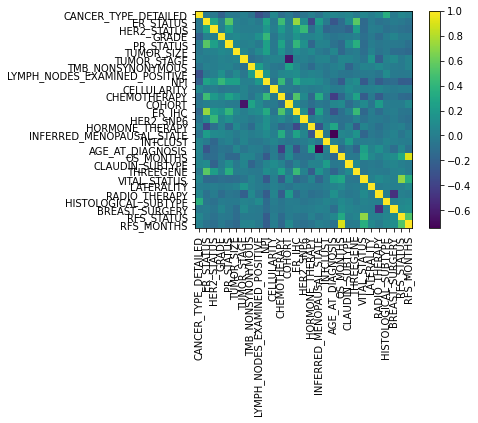

In [4]:
R_ref[1977].keys()

plt.imshow(R_ref[1977])
plt.colorbar()
plt.xticks(range(len(R_ref[1977].keys())), R_ref[1977].keys(), rotation=90)
plt.yticks(range(len(R_ref[1977].keys())), R_ref[1977].keys())
plt.show()

## Display results

### Baynet

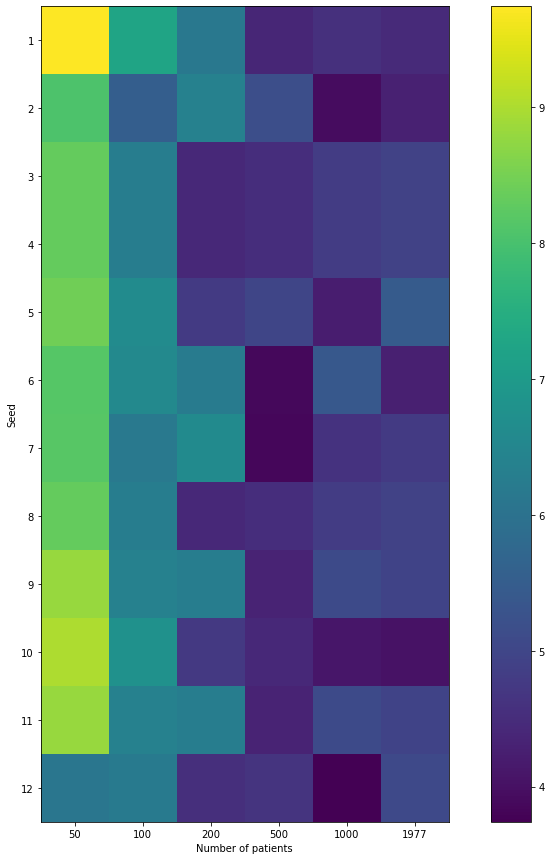

In [5]:
NORM = np.zeros((len(SEEDS_BAYNET), n_patients))

for i, seed in enumerate(SEEDS_BAYNET):
    for k, p in enumerate(PATIENTS):
        NORM[i, k] = np.linalg.norm(R_ref[p] - R_synth_Baynet[p, seed])

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar()
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.ylabel("Seed")
plt.yticks(range(12), SEEDS_BAYNET)
plt.show()

### CTGAN

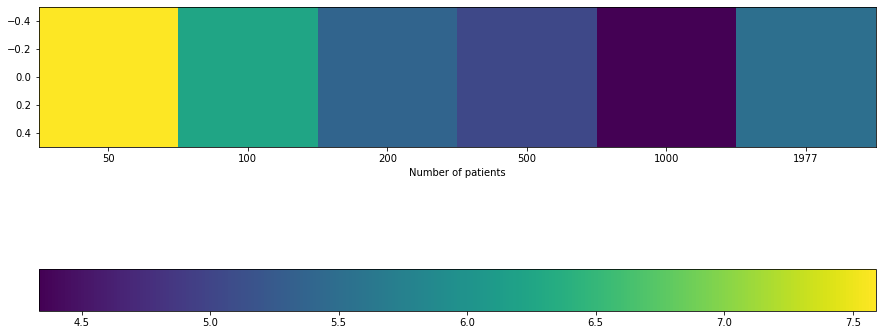

In [6]:
NORM = np.zeros((1, n_patients))

for k, p in enumerate(PATIENTS):
    NORM[0, k] = np.linalg.norm(R_ref[p] - R_synth_CTGAN[p])

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar(location='bottom')
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.show()

### MICC

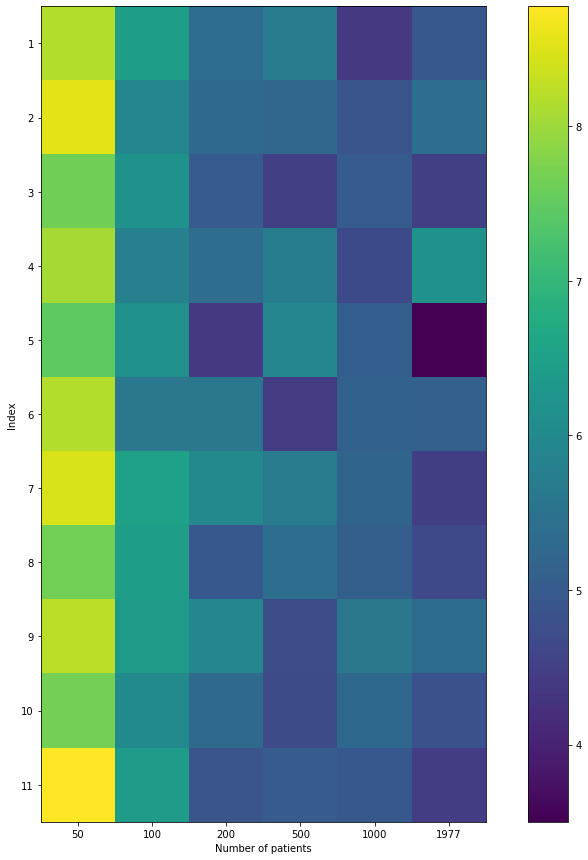

In [7]:
NORM = np.zeros((len(INDEX_MIIC), n_patients))

for i, index in enumerate(INDEX_MIIC):
    for k, p in enumerate(PATIENTS):
        NORM[i, k] = np.linalg.norm(R_ref[p] - R_synth_MIIC[p, index])

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar()
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.ylabel("Index")
plt.yticks(range(len(INDEX_MIIC)), INDEX_MIIC)
plt.show()

### PrivBayes

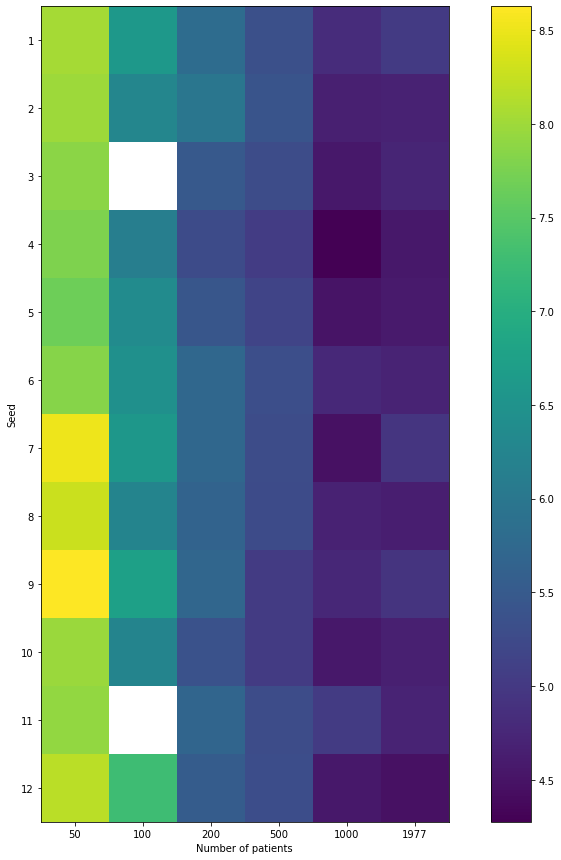

In [8]:
NORM = np.zeros((len(PRIV_BAYES_SEEDS), n_patients))

for i, seed in enumerate(PRIV_BAYES_SEEDS):
    for k, p in enumerate(PATIENTS):
        if not (p == 100 and seed == 11):
            NORM[i, k] = np.linalg.norm(R_ref[p] - R_synth_PRIVBayes[p, seed])
        else:
            NORM[i, k] = np.nan

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar()
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.ylabel("Seed")
plt.yticks(range(12), SEEDS_BAYNET)
plt.show()

### Synthpop

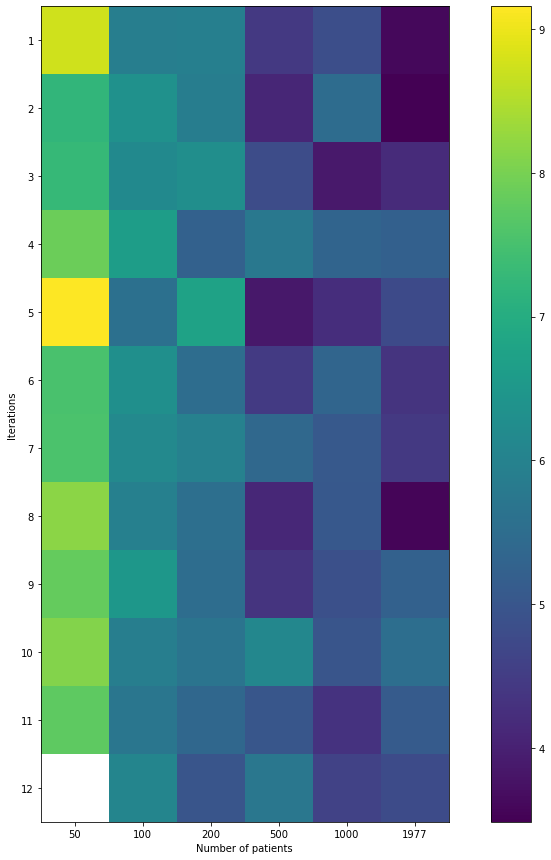

In [9]:
NORM = np.zeros((len(SYNTHPOP_ITERATIONS), n_patients))

for i, index in enumerate(SYNTHPOP_ITERATIONS):
    for k, p in enumerate(PATIENTS):
        NORM[i, k] = np.linalg.norm(R_ref[p] - R_synth_Synthpop[p, index])

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar()
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.ylabel("Iterations")
plt.yticks(range(len(SYNTHPOP_ITERATIONS)), SYNTHPOP_ITERATIONS)
plt.show()